#  Import the data and libraries

In [2]:
#Data
import pandas as pd
import numpy as np

#Visuaization
import matplotlib.pyplot as plt
import seaborn as sns
#LinearModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Accuracy
from sklearn.metrics import mean_absolute_error


In [3]:
#Importing  and reading the data
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print("The shape of the dataset is: ",df.shape)

The shape of the dataset is:  (25, 2)


In [5]:
print("The basic information about the data is:\n",df.describe())

The basic information about the data is:
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [6]:
# check data contains any null value
df.isnull().any().sum()

0

There is no null value in our dataset ,now we will check if there are any outliers in the data.

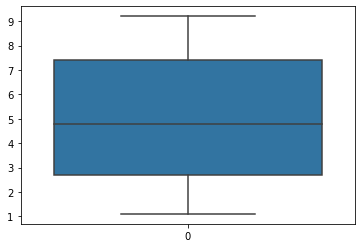

In [7]:
sns.boxplot(data=df['Hours'])

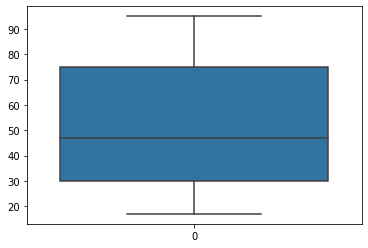

In [8]:
sns.boxplot(data=df['Scores'])

There are no outliers

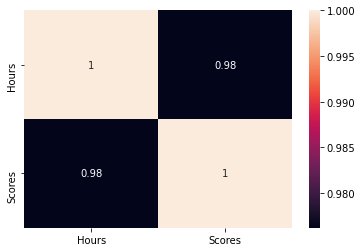

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

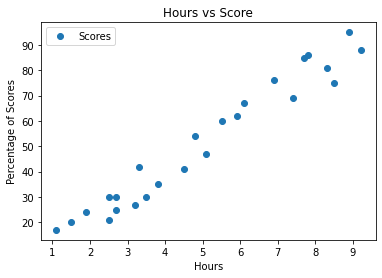

In [10]:
#Visualizing the data
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours')
plt.ylabel('Percentage of Scores')
plt.title('Hours vs Score')
plt.show()

Through this chart we can see that there is a linear relation between hours and scores.

Preparing data

In [11]:
X=df.iloc[:,0:1].values
y=df.iloc[:, 1].values
print("X contains:\n",X)
print("\ny contains:\n",y)


X contains:
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]

y contains:
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [12]:
#Splitting the data into train and test 
#x_train,x_test,y-train,y_test=train_test_split(X,Y,test_size=0.25,random_state=103)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
#lm model
#regr=LinearRegression()
#regr.fit(X_train,y_train)
#print("The model is been trained")

lm=LinearRegression()# Creating an object of Linear Regression
lm.fit(X_train,y_train)# Fitting the training data
print("The model has been trained.")

The model has been trained.


In [14]:

import statsmodels.api as sm
ls = sm.OLS(X_train,y_train).fit()
ls.summary()

C:\Users\shubzz\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1785.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                    1.17e-18
Time:                        19:17:40   Log-Likelihood:                         -15.115
No. Observations:                  18   AIC:                                      32.23
Df Residuals:                      17   BIC:                                      33.12
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0981      0.002     42.248      0.000       0.093       0.103
==============================================================================
Omnibus:                        4.516   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                1.799
Skew:                           0.401   Prob(JB):                        0.407
Kurtosis:                       1.676   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Visualization
line=lm.coef_*X+lm.intercept_ #y=mx+c

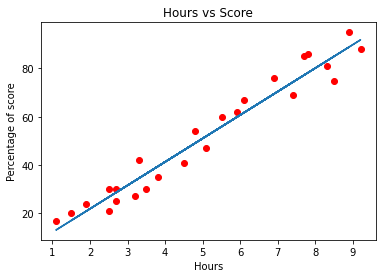

In [16]:
#Plotting data after visualization
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage of score')
plt.title('Hours vs Score')
plt.show()

### Prediction

In [17]:
y_pred=lm.predict(X_test)

In [18]:
#Displaying the data as actual vs predict
df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
df

,Actual Value,Predicted Value
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


In [19]:
coef=lm.coef_
coef

array([9.71409219])

In [20]:
intercept=lm.intercept_
intercept

2.480367091505741

In [21]:
#Now we will check how effeciently our model predicts the score
hours=9.25
score=lm.coef_*hours+lm.intercept_
print("If a student studies ", hours ,"hours per day then he will score",score[0],"%")

If a student studies  9.25 hours per day then he will score 92.33571987331146 %


In [22]:
#Obtaining the final score in terms of mean absolute error
final=mean_absolute_error(y_test,y_pred)
final

4.4253946751561815

Since our error rate comes to near by 4 it doesn't seems great model but it is a good model 

In [23]:
#Accuracy
Score=lm.score(X,y)
Score

0.9527510294211047

As we can see our accuracy score comes to 0.95 which tells that our prediction is approx 95% correct.

<h3><b>Thank You!!!</b></h3>

